# Add various kinds of noise then test denoising methods

In [1]:
import cv2
import PIL
import numpy
import matplotlib
import os
import matplotlib.pyplot as plt

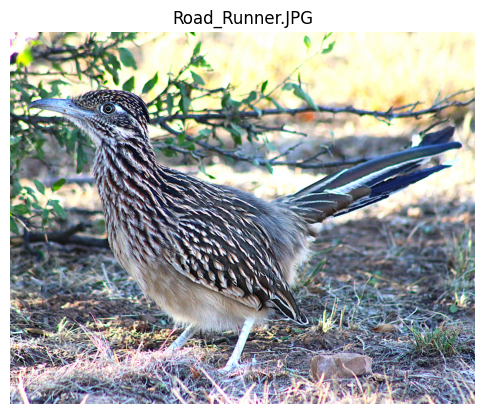

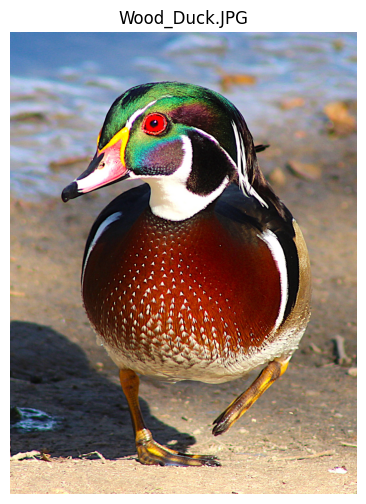

In [2]:
import matplotlib.pyplot as plt

image_folder = input("Image Folder Path: ")

# Supported image extensions
valid_ext = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')

if not os.path.isdir(image_folder):
    print("Invalid folder path.")
    exit(1)

# display all original images below
for image_name in sorted(os.listdir(image_folder)):
    if not image_name.lower().endswith(valid_ext):
        continue
    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_name}")
        continue
    # convert BGR (OpenCV) to RGB for correct colors in matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
    plt.show()

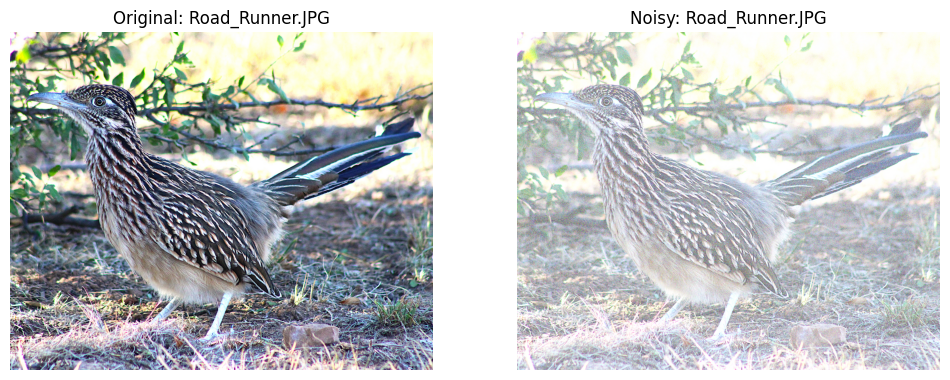

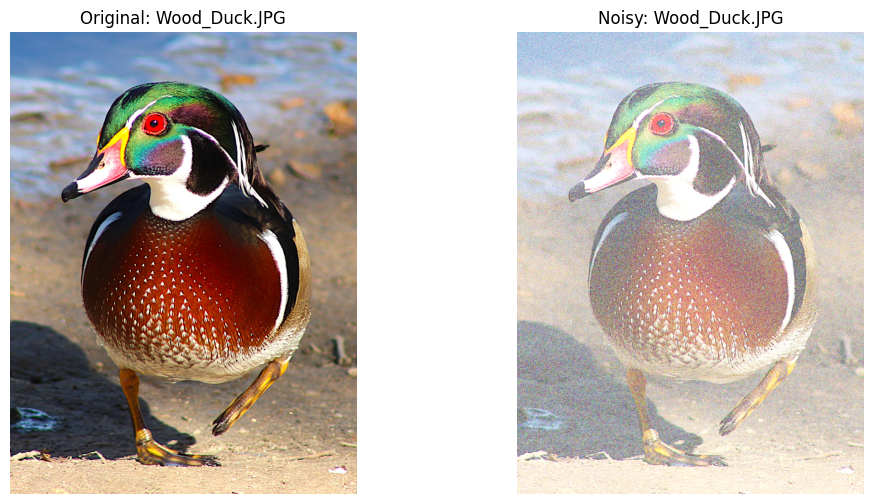

In [5]:
# Apply noise to images and display
for image_name in sorted(os.listdir(image_folder)):
    if not image_name.lower().endswith(valid_ext):
        continue
    image_path = os.path.join(image_folder, image_name)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_name}")
        continue
    # convert BGR (OpenCV) to RGB for correct colors in matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Add Gaussian noise
    mean = 0
    sigma = 25
    gauss = numpy.random.normal(mean, sigma, img.shape).astype('uint8')
    noisy_img = cv2.add(img, gauss)
    noisy_name = "noisy_" + image_name.strip().split('.')[0]
    cv2.imwrite(noisy_name + ".png", noisy_img)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(f"Original: {image_name}")
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(noisy_img)
    plt.title(f"Noisy: {image_name}")
    plt.axis('off')
    
    plt.show()

In [ ]:
# calculate PSNR and SSIM for noisy images
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

original_image = "C:\\ImageProcessing\\Project_5\\color\\Road_Runner.JPG"
noisy_image = "C:\\ImageProcessing\\Project_5\\noisy\\noisy_Road_Runner.png"

orig = cv2.imread(original_image)
noisy = cv2.imread(noisy_image)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
noisy = cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)
psnr_value = psnr(orig, noisy)
ssim_value = ssim(orig, noisy, multichannel=True)
print(f"PSNR: {psnr_value}")
print(f"SSIM: {ssim_value}")


Failed to load images for: Road_Runner.JPG
Failed to load images for: Wood_Duck.JPG
